<a href="https://colab.research.google.com/github/otoperalias/Coyuntura/blob/main/clases/Tema3_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tema 3.2. Desestacionalización (I)
Leer las diapositivas disponibles en el Aula Virtual antes de ejecutar este código.

In [1]:
#Importamos algunas librerías
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

#### La importancia de desestacionalizar

In [2]:
# Importamos datos de personas ocupadas (miles) de la CNTR
ocup=pd.read_excel("https://github.com/otoperalias/Coyuntura/raw/main/clases/datos/T3_ocupados_cntr.xlsx", index_col=0,parse_dates=True)
# Calculamos tasa de variación intertrimestral
ocup_tv=(ocup/ocup.shift(1)-1)*100

<ipython-input-2-69fe5090cb28>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ocup=pd.read_excel("https://github.com/otoperalias/Coyuntura/raw/main/clases/datos/T3_ocupados_cntr.xlsx", index_col=0,parse_dates=True)


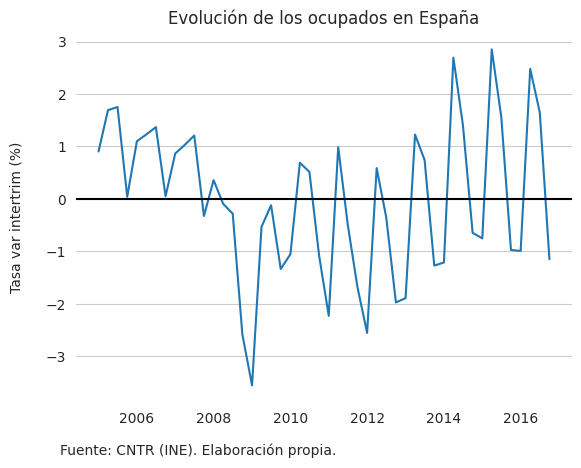

In [7]:
# Evolución de los ocupados (datos brutos)
fig,ax=plt.subplots()
sns.set_style("whitegrid") # Aquí utilizo el módulo seaborn, como complemento a matplotlib
sns.lineplot(data=ocup_tv.loc["2005":"2016",'ocup_naj'])
sns.despine(left=True, bottom=True)
ax.xaxis.grid(False)
ax.set_ylabel("Tasa var intertrim (%)\n")
ax.set_xlabel("")
ax.set_title("Evolución de los ocupados en España")
ax.axhline(0, color="black")
fig.text(0.1,0,"Fuente: CNTR (INE). Elaboración propia.")
plt.show()

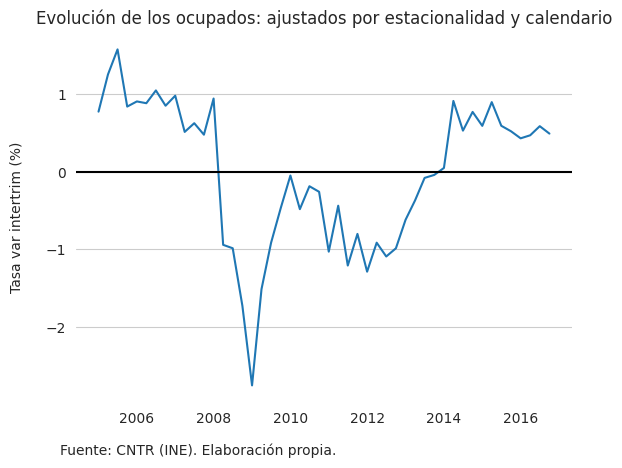

In [8]:
# Evolución de los ocupados (datos ajustados)
fig,ax=plt.subplots()
sns.set_style("whitegrid") # Aquí utilizo el módulo seaborn, como complemento a matplotlib
sns.lineplot(data=ocup_tv.loc["2005":"2016",'ocup_aj'])
sns.despine(left=True, bottom=True)
ax.xaxis.grid(False)
ax.set_ylabel("Tasa var intertrim (%)\n")
ax.set_xlabel("")
ax.set_title("Evolución de los ocupados: ajustados por estacionalidad y calendario")
ax.axhline(0, color="black")
fig.text(0.1,0,"Fuente: CNTR (INE). Elaboración propia.")
plt.show()

#### Descomposición clásica

In [9]:
#Importamos datos de pasajeros de aerolíneas (en miles)
series = pd.read_csv('https://raw.githubusercontent.com/otoperalias/Coyuntura/main/clases/datos/airline-passengers.csv', header=0, index_col=0, parse_dates=True)
series

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

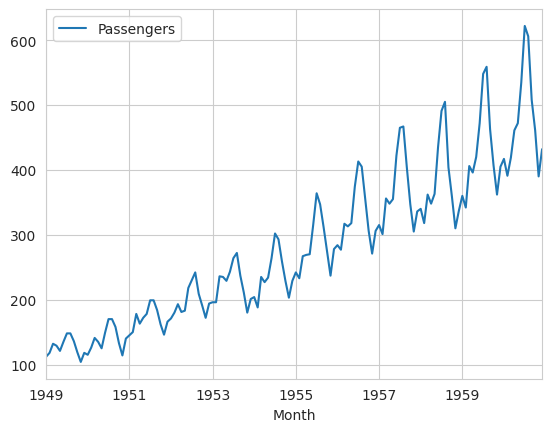

In [10]:
# Representar la serie
series.plot()

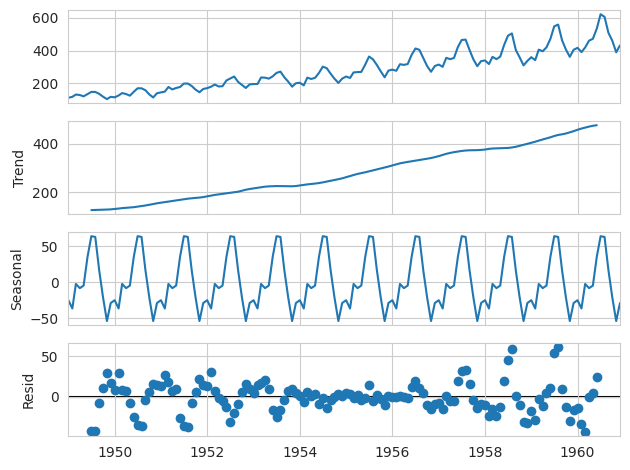

In [11]:
# Ejemplo descomposición aditiva
result_ad = sm.tsa.seasonal_decompose(series, model="additive")
result_ad.plot()
plt.show()

In [14]:
# Obtenemos serie ajustada
serieaj=series.Passengers-result_ad.seasonal

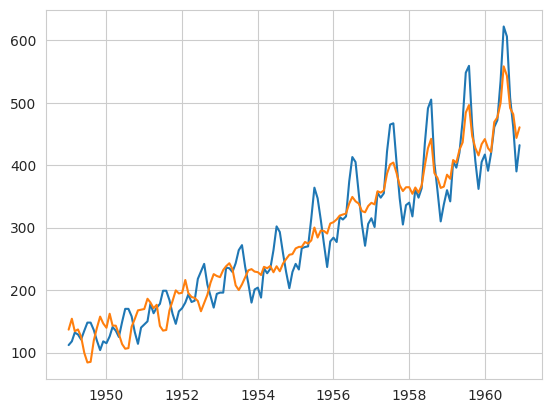

In [15]:
fig,ax=plt.subplots()
ax.plot(series.Passengers)
ax.plot(serieaj)
plt.show()

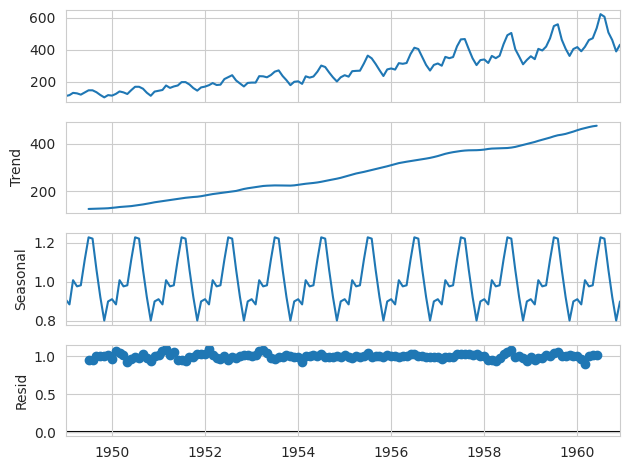

In [16]:
# Ejemplo de descomposición multiplicativa
result = sm.tsa.seasonal_decompose(series, model='multiplicative')
result.plot()
plt.show()

In [17]:
# Obtenemos serie ajustada
serieajm=series.Passengers/result.seasonal

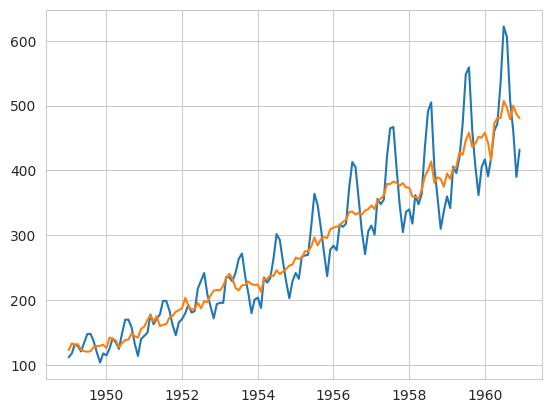

In [18]:
fig,ax=plt.subplots()
ax.plot(series.Passengers)
ax.plot(serieajm)
plt.show()

#### Descomposición STL

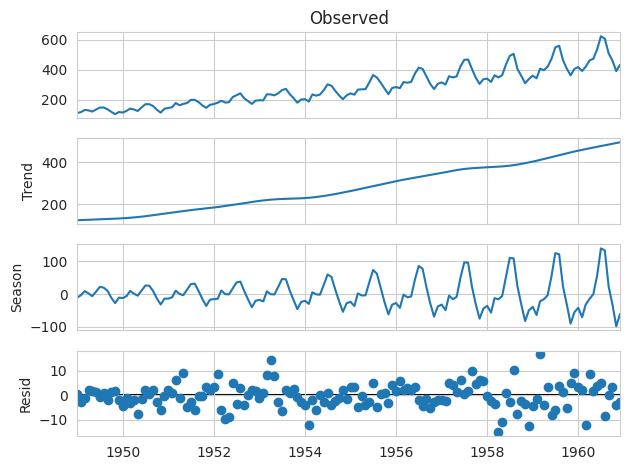

In [19]:
# Echar un vistazo a la página de ayuda:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.STL.html#statsmodels.tsa.seasonal.STL

#Ahora aplicamos el nuevo método a la serie de pasajeros de aerolíneas
result = sm.tsa.STL(series).fit()
result.plot()
plt.show()

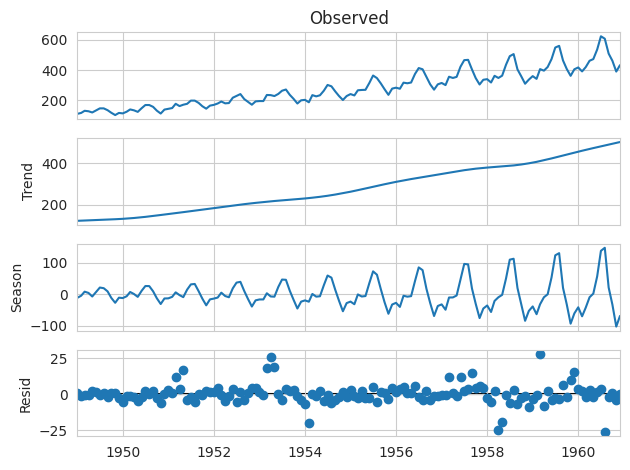

In [20]:
# Para reducir la influencia de los valores atípicos, se añade el argumento robust (no siempre es mejor o conveniente):
result = sm.tsa.STL(series, robust=True).fit()
result.plot()
plt.show()

In [21]:
serieaj_stl=series.Passengers-result.seasonal

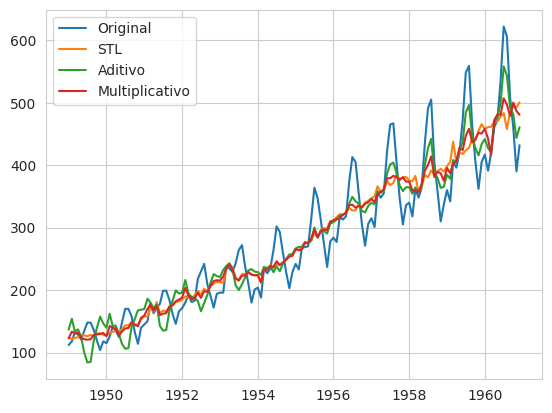

In [22]:
fig,ax=plt.subplots()
ax.plot(series.Passengers, label="Original")
ax.plot(serieaj_stl,label="STL")
ax.plot(serieaj,label="Aditivo")
ax.plot(serieajm,label="Multiplicativo")
ax.legend()
plt.show()

#### Material adicional:

Para profundizar en vuestros conocimientos, echad un vistazo a este gran recurso disponible en la web:  
http://www.chadfulton.com/topics/002-seasonal-adjustment.html

#### Ejemplo con datos de afiliaciones a la Seguridad Social

Fuente:  
https://w6.seg-social.es/PXWeb/pxweb/es/

Los datos a usar están disponibles aquí:  
https://github.com/otoperalias/Coyuntura/blob/main/clases/datos/series_seg_social.xlsx  
Se pueden importar directamente, sin necesidad de descargarlos en vuestro equipo. Para ello, debéis usar este enlace:  
https://raw.githubusercontent.com/otoperalias/Coyuntura/main/clases/datos/series_seg_social.xlsx  
No obstante, la primera vez que lo uséis es bueno descargar el archivo y echar un vistazo a los datos y así, entre otras cosas, ver si hay alguna columna para usar como index de la tabla, si esa columna se puede interpretar como fechas por ```pandas```, etc..


In [23]:
# Importamos los datos
ss=pd.read_excel("https://raw.githubusercontent.com/otoperalias/Coyuntura/main/clases/datos/series_seg_social.xlsx",
                 index_col=3, parse_dates=True)
ss

,Periodo,año,mes,afiliados
period,,,,
2001-01-01,Enero 2001,2001,1,15194299.22
2001-02-01,Febrero 2001,2001,2,15326583.35
2001-03-01,Marzo 2001,2001,3,15455386.40
2001-04-01,Abril 2001,2001,4,15551821.04
2001-05-01,Mayo 2001,2001,5,15688072.27
...,...,...,...,...
2020-06-01,Junio 2020,2020,6,18624336.68
2020-07-01,Julio 2020,2020,7,18785554.30
2020-08-01,Agosto 2020,2020,8,18792376.14


In [31]:
# Importamos mejor datos de afiliados más recientes
ss=pd.read_csv("/content/Afiliados medios_20241028-121229.csv",
               sep=";",skiprows=1, encoding="latin1")

# Primero: convertimos la columna en string
ss['Periodo']=ss['Periodo'].astype(str)
# Segundo: le damos formato
ss['Periodo']=ss['Periodo'].str[:4]+"-"+ss['Periodo'].str[-2:]
# Tercero: convertimos en datetime
ss['Periodo']=pd.to_datetime(ss['Periodo'])
# Cuarto: convertimos en index.
ss.set_index("Periodo", inplace=True)
# Quinto: renombramos columnas
ss.rename(columns={'Total Edad Total Sexo Todos los Regimenes':"total",
                   'Total Edad Total Sexo REGIMEN GENERAL':"general",
                   'Total Edad Total Sexo R.G.(S.E.AGRARIO)':"campo",
                   'Total Edad Total Sexo REG. ESP. AUTONOMOS':"auto"},inplace=True)


<Axes: xlabel='Periodo'>

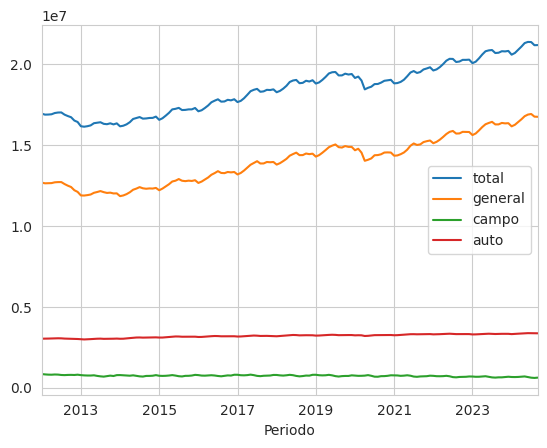

In [34]:
ss.plot()

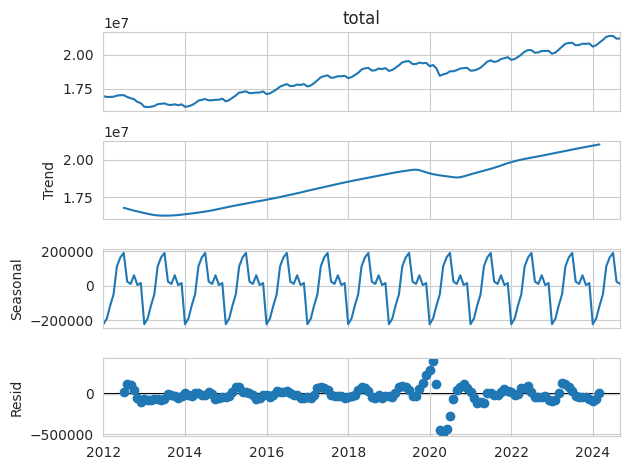

In [39]:
# Descomposición clásica aditiva
result = sm.tsa.seasonal_decompose(ss["total"], model="additive")
ss_ad=ss["total"]-result.seasonal
result.plot()
plt.show()

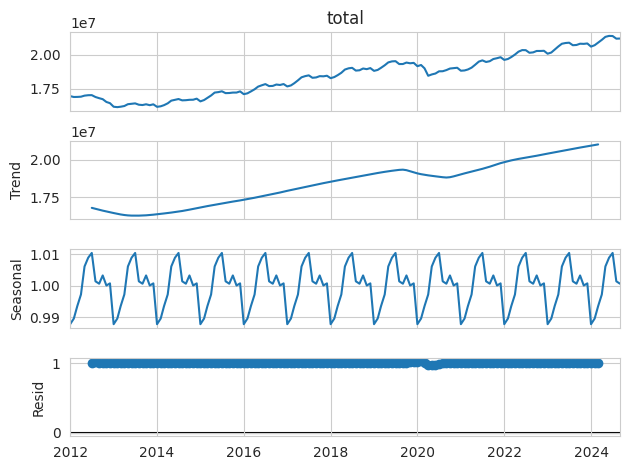

In [40]:
# Descomposición clásica multiplicativa
result = sm.tsa.seasonal_decompose(ss["total"], model="multiplcative")
ss_mul=ss["total"]/result.seasonal
result.plot()
plt.show()

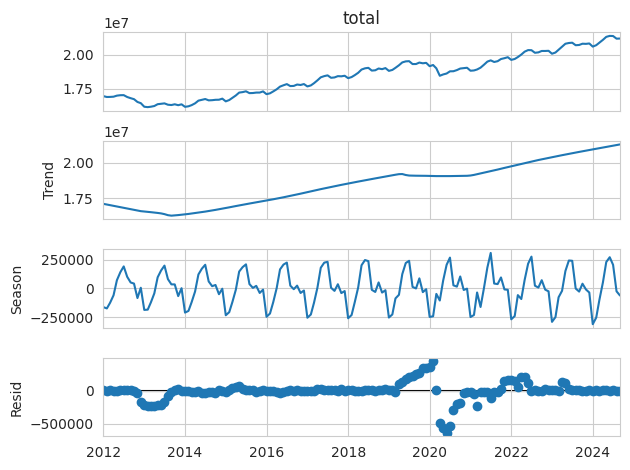

In [41]:
# Descomposición STL
result = sm.tsa.STL(ss["total"], robust=True).fit()
ss_stl=ss["total"]-result.seasonal
result.plot()
plt.show()

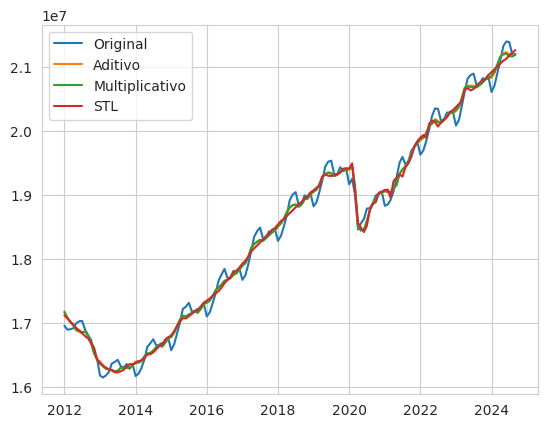

In [42]:
# GRÁFICO CON LA SERIE ORIGINAL Y LA AJUSTADA CON LOS TRES MÉTODOS
fig,ax=plt.subplots()
ax.plot(ss.total, label="Original")
ax.plot(ss_ad,label="Aditivo")
ax.plot(ss_mul,label="Multiplicativo")
ax.plot(ss_stl,label="STL")
ax.legend()
plt.show()

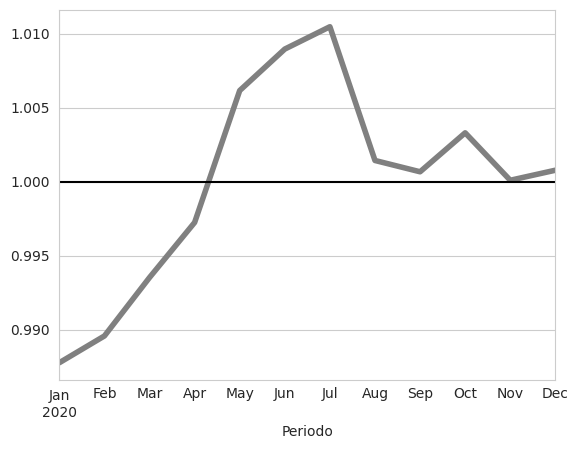

In [43]:
# Gráfico para ver en qué meses hay más y menos afiliados
result = sm.tsa.seasonal_decompose(ss["total"], model="multiplcative")
fig,ax=plt.subplots()
result.seasonal["2020"].plot(ax=ax,color="grey",linewidth=4) # da igual el año que se elija (siempre igual en la desc. clásica)
ax.axhline(1,color="black")
plt.show()

<ipython-input-50-512264820ef3>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


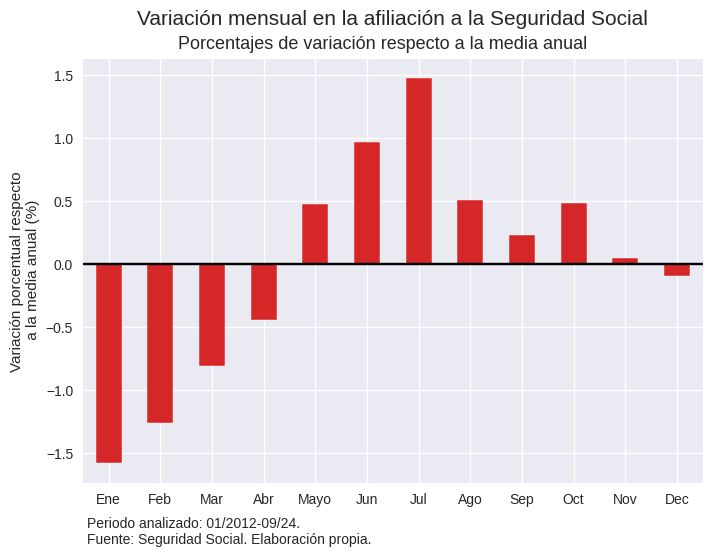

In [50]:
# GRÁFICO MÁS PROFESIONAL
# a. Preparamos los datos
import numpy as np
result = sm.tsa.seasonal_decompose(ss["general"], model="multiplcative")
df=(result.seasonal["2020"]-1)*100  # da igual el año que se elija (siempre igual en la desc. clásica)
meses_num=np.arange(0,12)
meses=["Ene","Feb","Mar","Abr","Mayo","Jun","Jul","Ago","Sep","Oct","Nov","Dec"]
# a. Creamos el gráfico
plt.style.use('seaborn')
fig,ax=plt.subplots()
df.plot.bar(ax=ax,color="tab:red")
ax.set_xticks(meses_num)
ax.set_xticklabels(meses, rotation='horizontal')
ax.axhline(0,color="black")
ax.set_ylabel("Variación porcentual respecto\n a la media anual (%)")
ax.set_xlabel("")
ax.set_title("Variación mensual en la afiliación a la Seguridad Social", size=15, pad=25)
fig.text(0.5,0.9,"Porcentajes de variación respecto a la media anual", size=13,ha="center")
fig.text(0.13,0,"Periodo analizado: 01/2012-09/24.\nFuente: Seguridad Social. Elaboración propia.")
plt.show()